In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import r2_score

df = pd.read_csv("linear_data.csv")

x = df[['user_posts','total responses']].values
y = df['TRUST'].values


#Split the dataset in training/test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

scaler = StandardScaler()

#Train the model on the training set
normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train))
reg = LinearRegression()
LR = reg.fit(normalized_x_train, y_train)

#Predict the test set results
normalized_x_test = pd.DataFrame(scaler.transform(x_test))
y_test_pred = reg.predict(normalized_x_test)
print(y_test_pred)

[0.27322096 0.2962217  0.29571945 0.33790255 0.26779787 0.32413952
 0.26317838 0.27261825 0.27543088 0.26639281 0.26779787 0.26347973
 0.2979256  0.26799877 0.27382366 0.27352231 0.26297748 0.26307793
 0.26317838 0.26769742 0.27643539 0.43721585 0.26297748 0.26337928
 0.3329792  0.26327883 0.31971843 0.27372321 0.27653584 0.28898798
 0.29380837 0.37696289 0.28668389 0.29742335 0.26307793 0.30053733
 0.26860147 0.28668012 0.49968752 0.27291961 0.31490181 0.26418289
 0.33177002 0.31178657 0.28868663 0.26297748 0.26337928 0.27291961
 0.26287703 0.5938841  0.26749777 0.27352231 0.26418289 0.2911979
 0.26297748 0.28045217 0.27804135 0.46523663 0.2993407  0.42688447
 0.28527256 0.26769867 0.31329459 0.26890283 0.28336525 0.36752176
 0.27392412 0.32001978 0.27061049 0.26940508 0.26609146 0.26297748
 0.26277658 0.28617787 0.27291961 0.26789832 0.30766934 0.27071094
 0.26910373 0.27462727 0.27131365 0.26287703 0.30074702 0.26287703
 0.31228757 0.27452682 0.26287703 0.30465456 0.30235047 0.30395

In [2]:
reg.predict([[79,1204]])

array([32.47907711])

In [3]:
#Evaluate my model
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

-0.040403029866116436

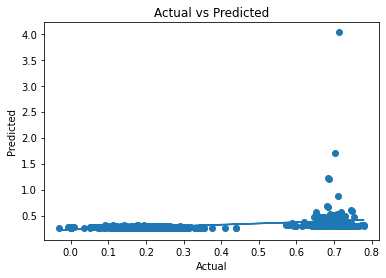

In [4]:
#Plot the results
import matplotlib.pyplot as plt
from scipy import stats
#plt.figure(figsize=(15,10))
slope, intercept, r, p, std_err = stats.linregress(y_test, y_test_pred)

def myfunc(y_test):
    return slope * y_test + intercept

mymodel = list(map(myfunc, y_test))

plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot(y_test, mymodel)
plt.show()

In [5]:
pred_y_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_test_pred, 'Difference': y_test-y_test_pred })
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,0.2016,0.273221,-0.071621
1,0.1220,0.296222,-0.174222
2,0.2130,0.295719,-0.082719
3,0.7040,0.337903,0.366097
4,0.3550,0.267798,0.087202
5,0.7096,0.324140,0.385460
6,0.2300,0.263178,-0.033178
7,0.2050,0.272618,-0.067618
8,0.2416,0.275431,-0.033831
9,0.1500,0.266393,-0.116393
